In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# cd drive/MyDrive/master_thesis/final_code

In [3]:
# !pip install kornia -qqq
# !pip install torchinfo -qqq
# !pip install wandb -qqq

In [4]:
import pickle
import numpy as np 
import os

from py_files.plot_utils import *
from py_files.data_utils import *

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\kornia\augmentation\augmentation.py:1833: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


In [5]:
all_runs = np.array(sorted(os.listdir(path='saved_results')))

for run in all_runs: 
    print(run)

old
pi_gan_2021_10_05_08_57_16_colab_sdf_test
pi_gan_2021_10_05_09_00_34__colab_sdf_test
pi_gan_2021_10_05_09_09_50_colab_sdf_test
pi_gan_2021_10_05_09_11_04__colab_sdf_test
pi_gan_2021_10_05_09_12_14___colab_sdf_test
reconstruction_big_x
reconstruction_big_y
reconstruction_big_z
reconstruction_normal
reconstruction_train_dl_augmented_trained_with_data_aug
reconstruction_train_dl_trained_one_image
reconstruction_train_dl_trained_with_data_aug
reconstruction_train_dl_trained_without_data_aug
segmentation_binary
segmentation_binary_big_x
segmentation_binary_big_y
segmentation_binary_big_z
segmentation_binary_deep
segmentation_sdf_lambda_100
segmentation_sdf_lambda_300
segmentation_sdf_x


c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


torch.Size([1, 1, 24, 128, 128])
torch.Size([1, 3, 24, 128, 128])


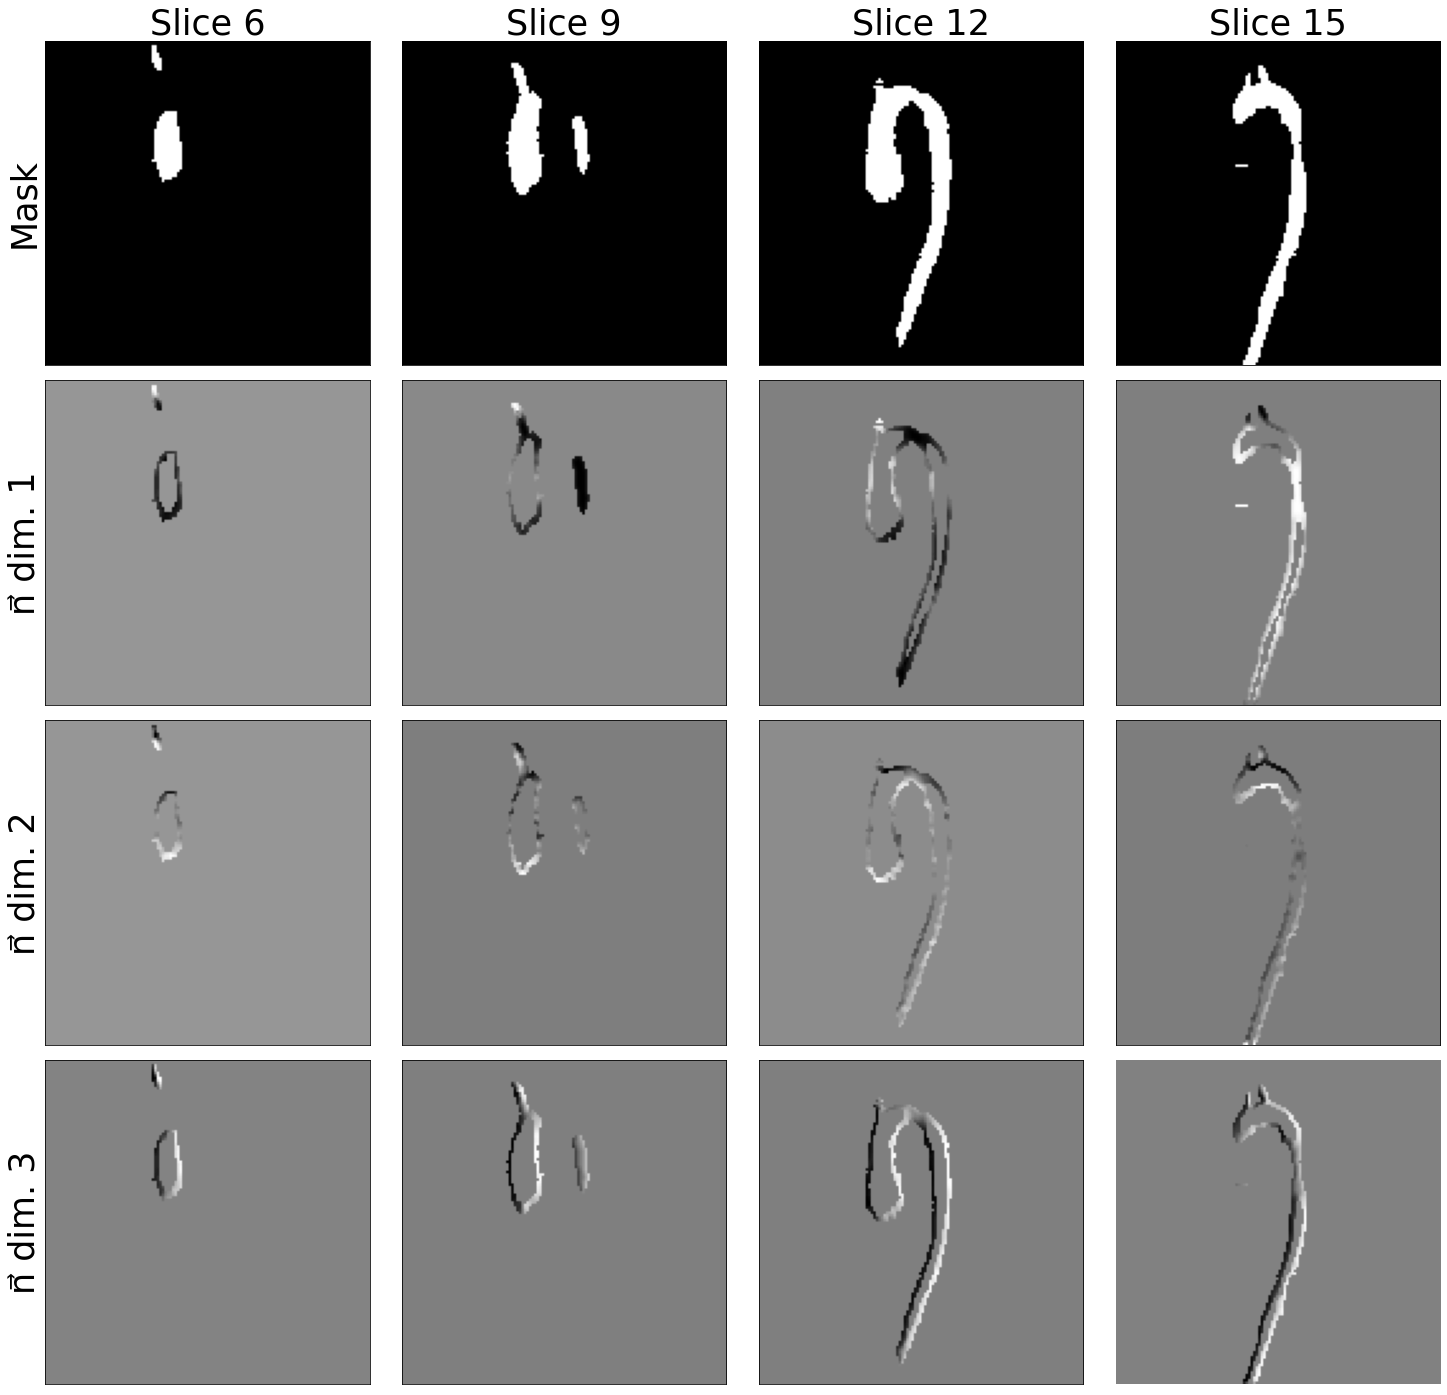

In [6]:
mask = np.load(os.path.join(os.pardir, "Dataset", "new_original", "100__data_p3__original__mask.npy"))

mask = torch.tensor(mask).float().permute(2, 0, 1).unsqueeze(0).unsqueeze(0)


DEVICE = torch.device("cpu")
blur_layer = initialize_blurring_layer(1.0, DEVICE)
maxpool_layer = torch.nn.MaxPool3d(3,stride=1,padding=1).to(DEVICE)

mask_eroded = 1 - maxpool_layer(1 - mask)
surface = (mask - mask_eroded).type(torch.float32)

# get the norm
masks_blurred = blur_layer(mask)     

grad, grad_magn = gradient3d(masks_blurred, normalize=True, s=2)
norm = grad * surface * -1
    
print(mask.shape)
print(norm.shape)

mask =  mask[0, 0, :, :, :]
x_norm = norm[0, 0, :, :, :]
y_norm = norm[0, 1, :, :, :]
z_norm = norm[0, 2, :, :, :]

fig, axs = plt.subplots(4, 4, figsize=(25, 25))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0)

plt.axis('off')

i = 6

axs[0, 0].set_title(f"Slice {i}", fontsize=35)
axs[0, 0].imshow(mask[i], cmap="gist_gray")
axs[1, 0].imshow(x_norm[i], cmap="gist_gray")
axs[2, 0].imshow(y_norm[i], cmap="gist_gray")
axs[3, 0].imshow(z_norm[i], cmap="gist_gray")

axs[0, 0].set_ylabel("Mask", fontsize=35)
axs[1, 0].set_ylabel("n\u20D7 dim. 1", fontsize=35)
axs[2, 0].set_ylabel("n\u20D7 dim. 2", fontsize=35)
axs[3, 0].set_ylabel("n\u20D7 dim. 3", fontsize=35)

i = 9
axs[0, 1].set_title(f"Slice {i}", fontsize=35)
axs[0, 1].imshow(mask[i], cmap="gist_gray")
axs[1, 1].imshow(x_norm[i], cmap="gist_gray")
axs[2, 1].imshow(y_norm[i], cmap="gist_gray")
axs[3, 1].imshow(z_norm[i], cmap="gist_gray")


i = 12
axs[0, 2].set_title(f"Slice {i}", fontsize=35)
axs[0, 2].imshow(mask[i], cmap="gist_gray")
axs[1, 2].imshow(x_norm[i], cmap="gist_gray")
axs[2, 2].imshow(y_norm[i], cmap="gist_gray")
axs[3, 2].imshow(z_norm[i], cmap="gist_gray")

i = 15
axs[0, 3].set_title(f"Slice {i}", fontsize=35)
axs[0, 3].imshow(mask[i], cmap="gist_gray")
axs[1, 3].imshow(x_norm[i], cmap="gist_gray")
axs[2, 3].imshow(y_norm[i], cmap="gist_gray")
axs[3, 3].imshow(z_norm[i], cmap="gist_gray")


plt.show()

# PCMRA and Mask

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']


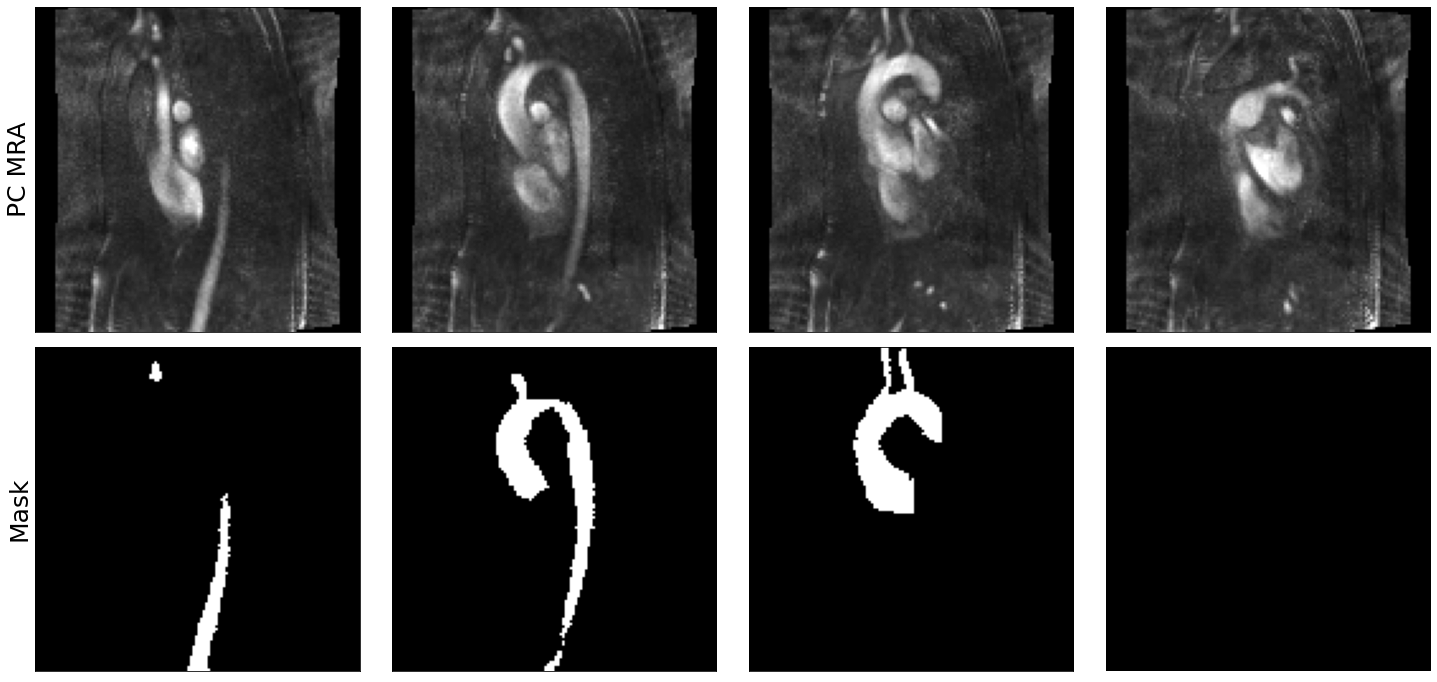

In [7]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(2, 4, figsize=(25, 12.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0)

plt.axis('off')

i = 3
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Mask", fontsize=25)

i = 9
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 15
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 21
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")

plt.show()

# Reconstruction

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output']


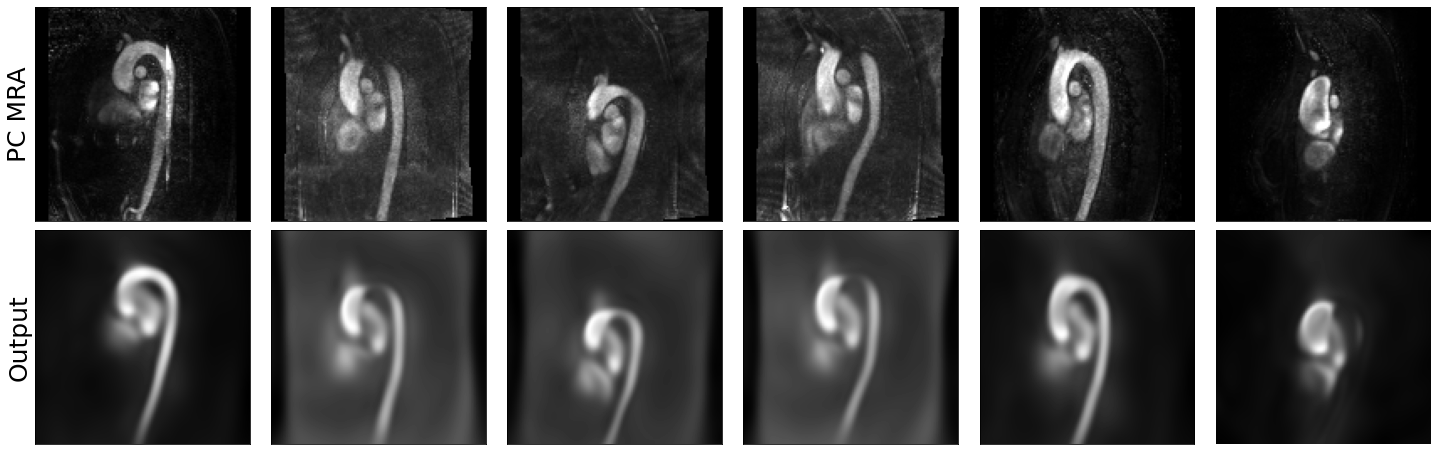

In [8]:
run = "reconstruction_normal"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(2, 6, figsize=(25, 8.2))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0)

plt.axis('off')

i = 132
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Output", fontsize=25)

i = 151
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 178
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 275
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 396
axs[0, 4].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 4].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 515
axs[0, 5].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 5].imshow(images[1][0][:,:,i], cmap="gist_gray")

plt.show()


# Segmentation

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']


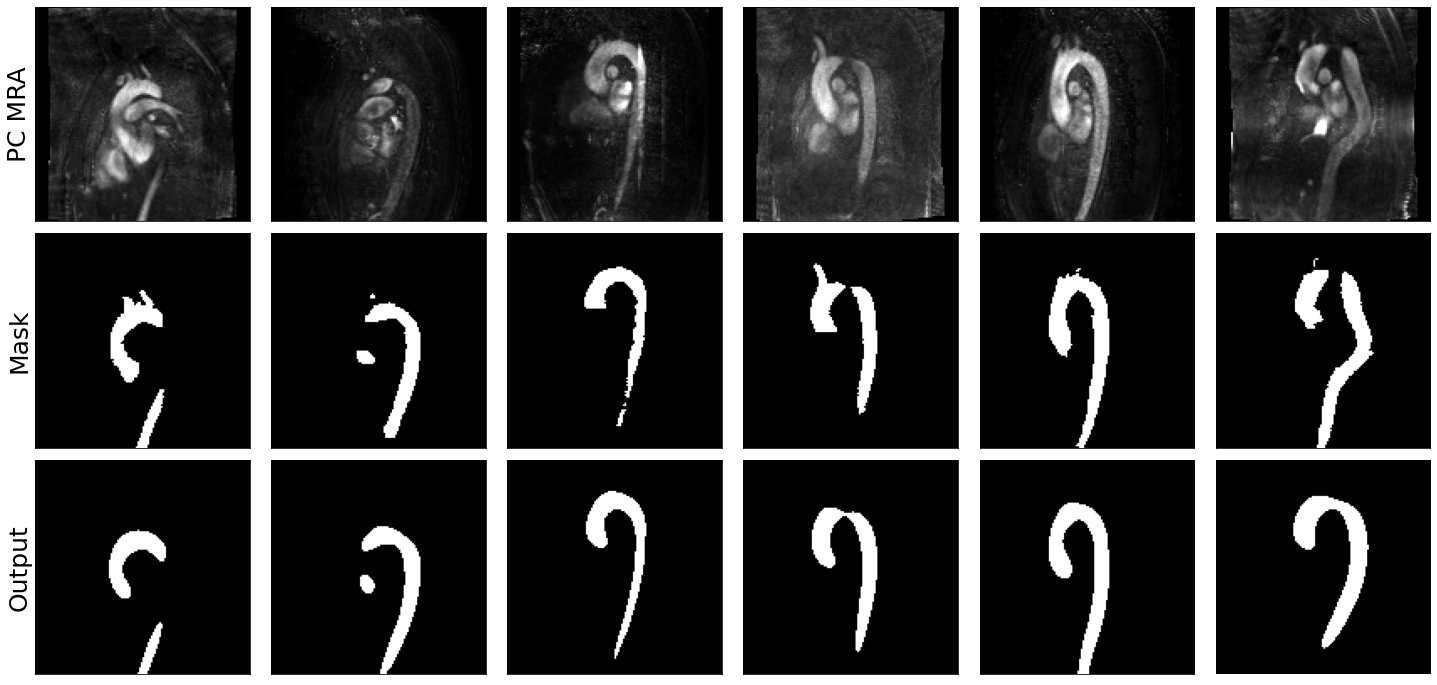

In [9]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(3, 6, figsize=(25, 12.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0)

plt.axis('off')

i = 83
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 0].imshow(images[2][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Mask", fontsize=25)
axs[2, 0].set_ylabel("Output", fontsize=25)

i = 542
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 1].imshow(images[2][0][:,:,i], cmap="gist_gray")

i = 133
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 2].imshow(images[2][0][:,:,i], cmap="gist_gray")

i = 153
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 3].imshow(images[2][0][:,:,i], cmap="gist_gray")

i = 397
axs[0, 4].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 4].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 4].imshow(images[2][0][:,:,i], cmap="gist_gray")

i = 345
axs[0, 5].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 5].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 5].imshow(images[2][0][:,:,i], cmap="gist_gray")

plt.show()

# Segmentation SDF

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output' 'plus' 'masks' 'mask output']


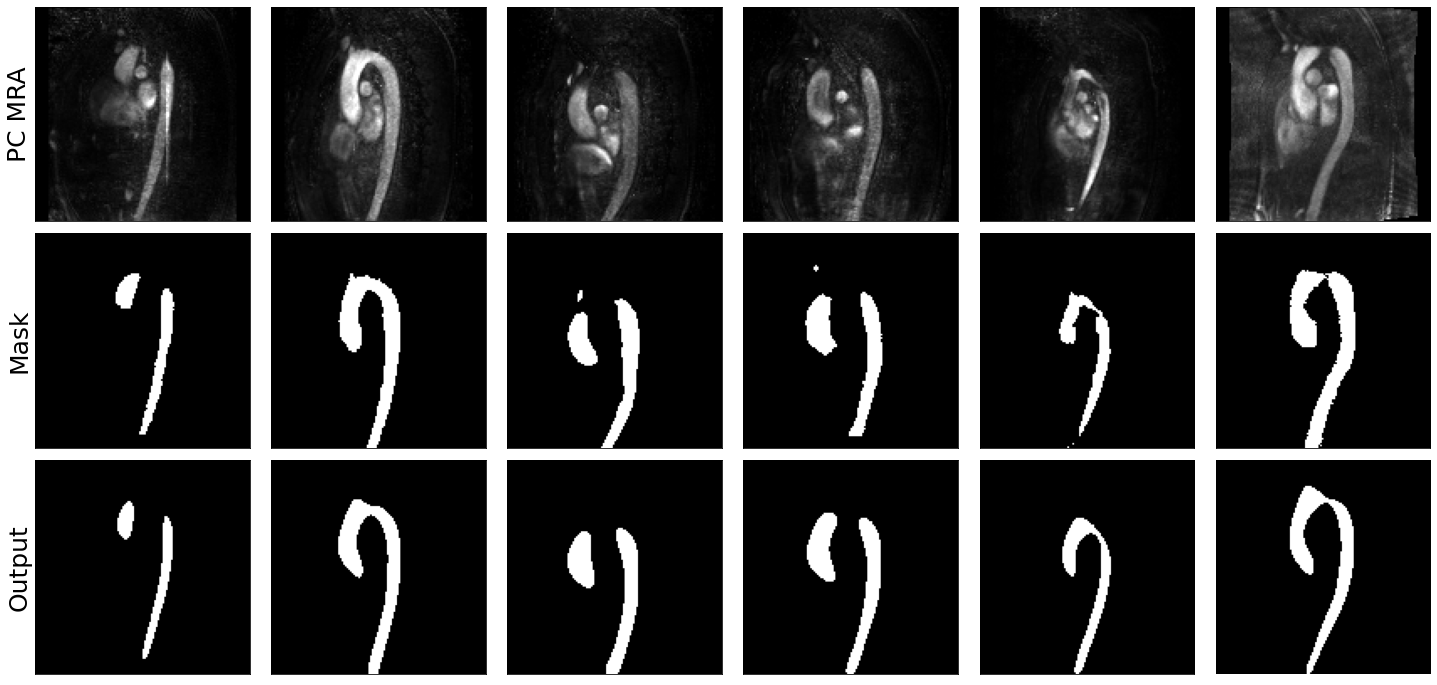

In [10]:
run = "segmentation_sdf_lambda_300"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(3, 6, figsize=(25, 12.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0)

plt.axis('off')
i = 128
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 0].imshow(images[4][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Mask", fontsize=25)
axs[2, 0].set_ylabel("Output", fontsize=25)

i = 396
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 1].imshow(images[4][0][:,:,i], cmap="gist_gray")

i = 464
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 2].imshow(images[4][0][:,:,i], cmap="gist_gray")

i = 416
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 3].imshow(images[4][0][:,:,i], cmap="gist_gray")

i = 611
axs[0, 4].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 4].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 4].imshow(images[4][0][:,:,i], cmap="gist_gray")

i = 278
axs[0, 5].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 5].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 5].imshow(images[4][0][:,:,i], cmap="gist_gray")

plt.show()

# Segmentation SDF lambda comparison

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output' 'plus' 'masks' 'mask output']


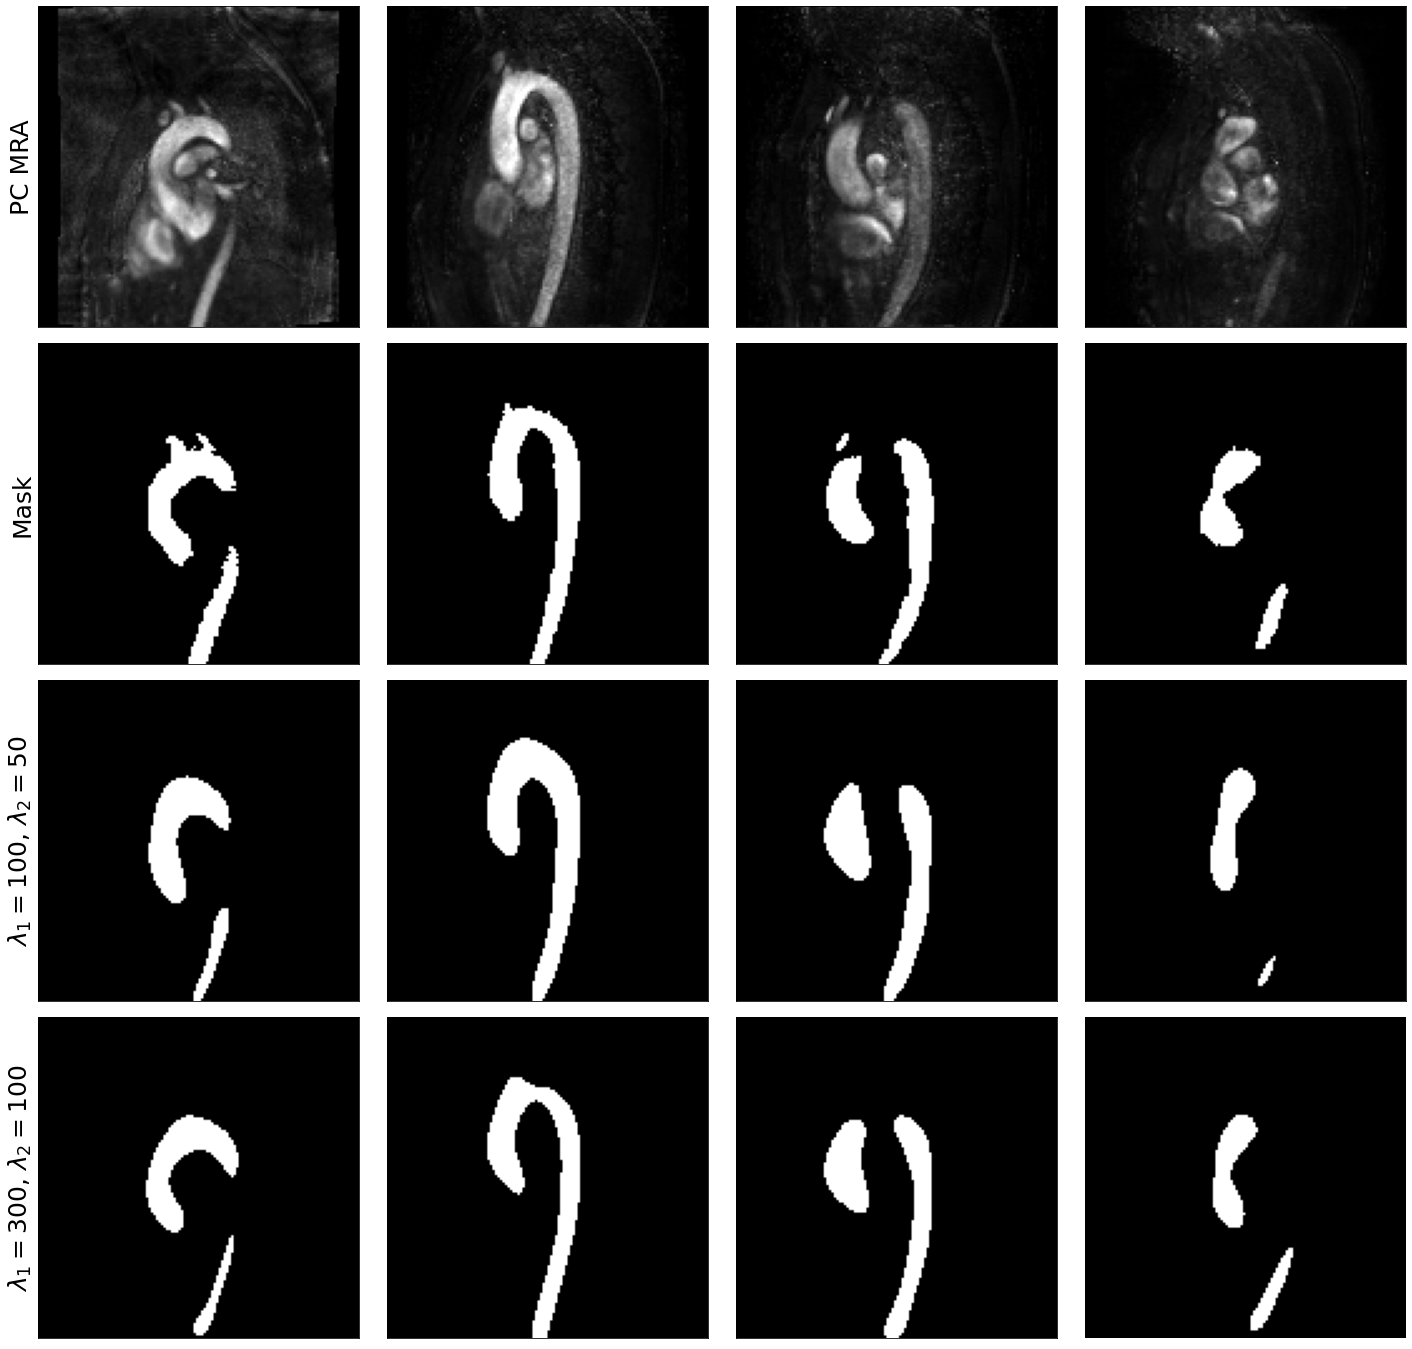

In [11]:
run = "segmentation_sdf_lambda_100"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_sdf_lambda_300"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(4, 4, figsize=(25, 24.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0, hspace=0.05)

plt.axis('off')

i = 82
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 0].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[3, 0].imshow(images_1[4][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Mask", fontsize=25)
axs[2, 0].set_ylabel(r"$\lambda_{1}=100$, $\lambda_{2}=50$", fontsize=25)
axs[3, 0].set_ylabel(r"$\lambda_{1}=300$, $\lambda_{2}=100$", fontsize=25)

i = 396
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 1].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[3, 1].imshow(images_1[4][0][:,:,i], cmap="gist_gray")

i = 465
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 2].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[3, 2].imshow(images_1[4][0][:,:,i], cmap="gist_gray")

i = 539
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[2, 3].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[3, 3].imshow(images_1[4][0][:,:,i], cmap="gist_gray")
plt.show()


# Binary segmentation super resolution

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']


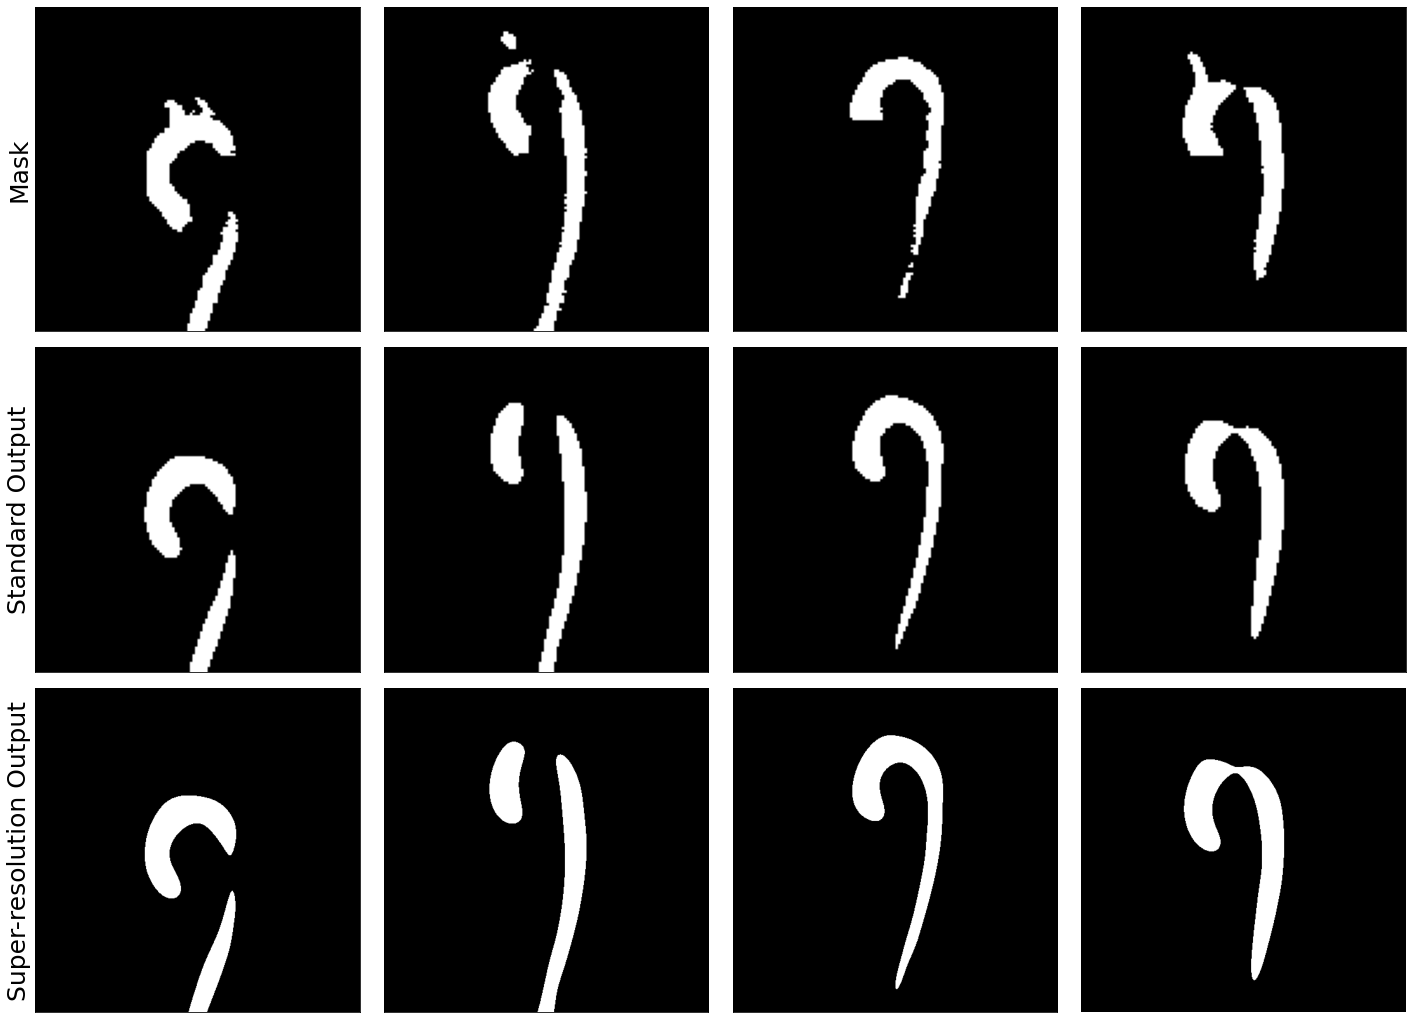

In [12]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_binary_big_x"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(3, 4, figsize=(25, 18.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0, hspace=0.05)

plt.axis('off')

i = 82
axs[0, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[2][0][:,:,i], cmap="gist_gray")
axs[2, 0].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("Mask", fontsize=25)
axs[1, 0].set_ylabel("Standard Output", fontsize=25)
axs[2, 0].set_ylabel("Super-resolution Output", fontsize=25)

i = 8
axs[0, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[2][0][:,:,i], cmap="gist_gray")
axs[2, 1].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

i = 133
axs[0, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[2][0][:,:,i], cmap="gist_gray")
axs[2, 2].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

i = 153
axs[0, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[2][0][:,:,i], cmap="gist_gray")
axs[2, 3].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output' 'plus' 'masks' 'mask output']


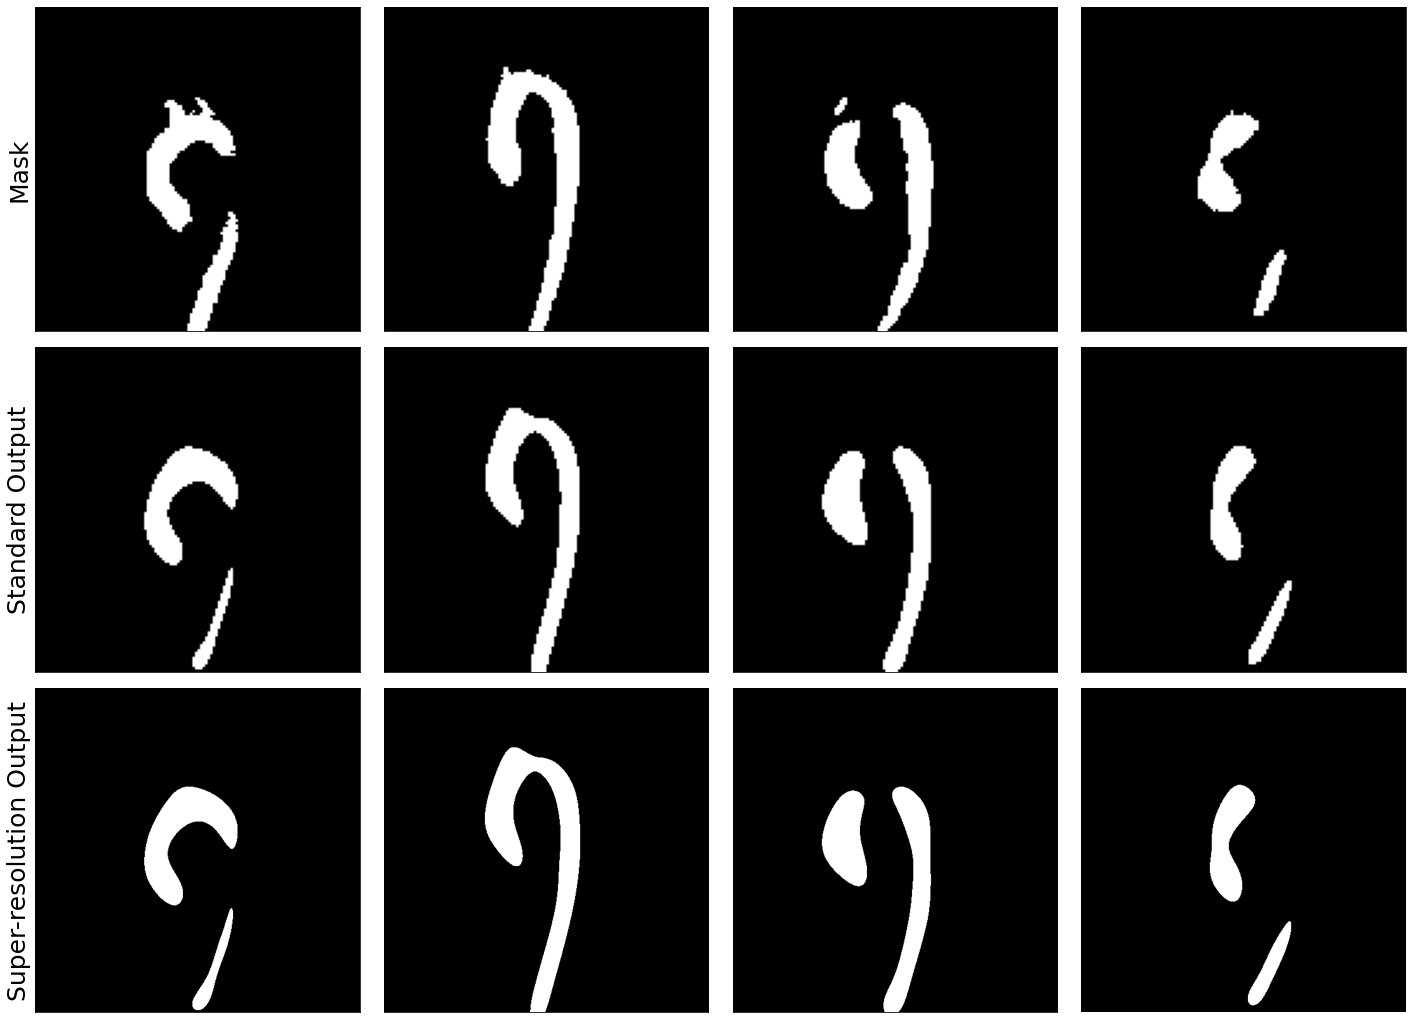

In [13]:
run = "segmentation_sdf_lambda_300"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_sdf_x"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(3, 4, figsize=(25, 18.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0, hspace=0.05)

plt.axis('off')

i = 82
axs[0, 0].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[2, 0].imshow(images_1[3][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("Mask", fontsize=25)
axs[1, 0].set_ylabel("Standard Output", fontsize=25)
axs[2, 0].set_ylabel("Super-resolution Output", fontsize=25)

i = 396
axs[0, 1].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[2, 1].imshow(images_1[3][0][:,:,i], cmap="gist_gray")

i = 465
axs[0, 2].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[2, 2].imshow(images_1[3][0][:,:,i], cmap="gist_gray")

i = 539
axs[0, 3].imshow(images[3][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[4][0][:,:,i], cmap="gist_gray")
axs[2, 3].imshow(images_1[3][0][:,:,i], cmap="gist_gray")

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']
(128, 128, 720)
(128, 512, 2880)


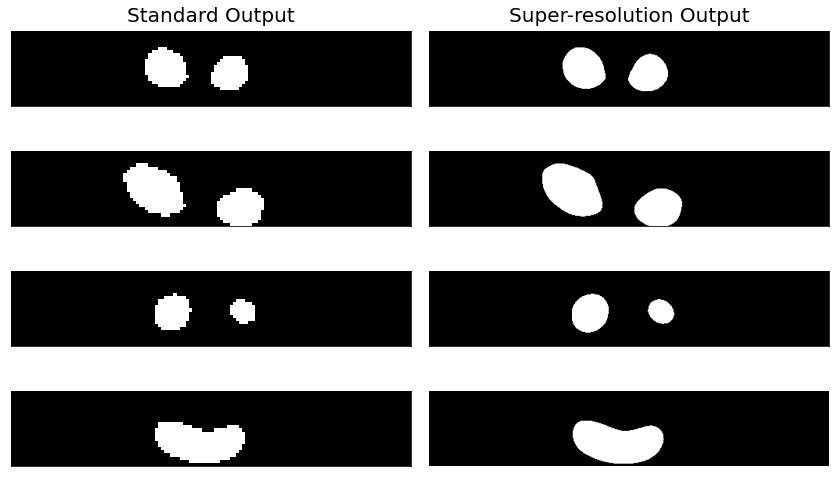

In [16]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_binary_big_y"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(4, 2, figsize=(15, 8))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0, hspace=0.6)

plt.axis('off')

print(images[2][0].shape)
print(images_1[2][0].shape)


transpose = (2, 1, 0)

mask = images[2][0].reshape(128, 128, 30, 24)
mask_1 = images_1[2][0].reshape(128, 512, 30, 96)

slce = 30

subj = 0 
axs[0, 0].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[0, 0].set_title("Standard Output", fontsize=20, pad=10)

axs[0, 1].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[0, 1].set_title("Super-resolution Output", fontsize=20, pad=10)

subj = 1
axs[1, 0].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[1, 1].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")

subj = 2
axs[2, 0].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[2, 1].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")

subj = 4
axs[3, 0].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[3, 1].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")


c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']
(128, 128, 720)
(512, 128, 2880)


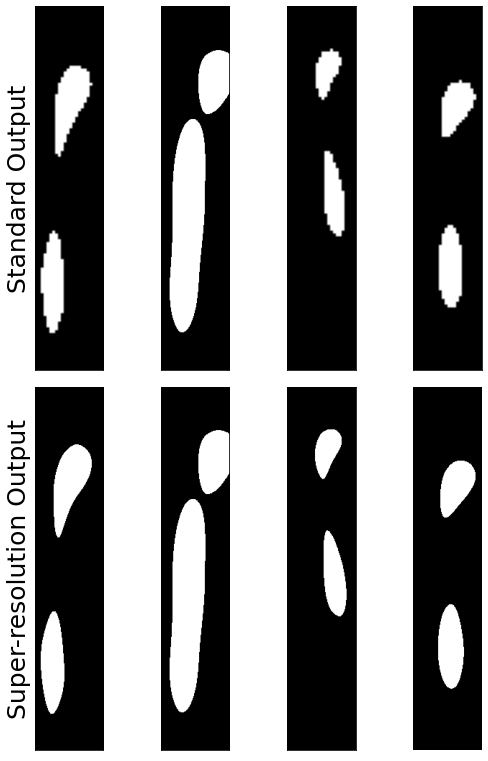

In [17]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_binary_big_z"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(2, 4, figsize=(8, 14))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.85, hspace=0)

plt.axis('off')

print(images[2][0].shape)
print(images_1[2][0].shape)

transpose = (0, 2, 1)

mask = images[2][0].reshape(128, 128, 30, 24)
mask_1 = images_1[2][0].reshape(512, 128, 30, 96)

slce = 70

subj = 0 
axs[0, 0].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[1, 0].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[0, 0].set_ylabel("Standard Output", fontsize=25)
axs[1, 0].set_ylabel("Super-resolution Output", fontsize=25)


subj = 1
axs[0, 1].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[1, 1].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")

subj = 2
axs[0, 2].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[1, 2].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")

subj = 4
axs[0, 3].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[1, 3].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")


# Reconstruction super-resolution

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output']


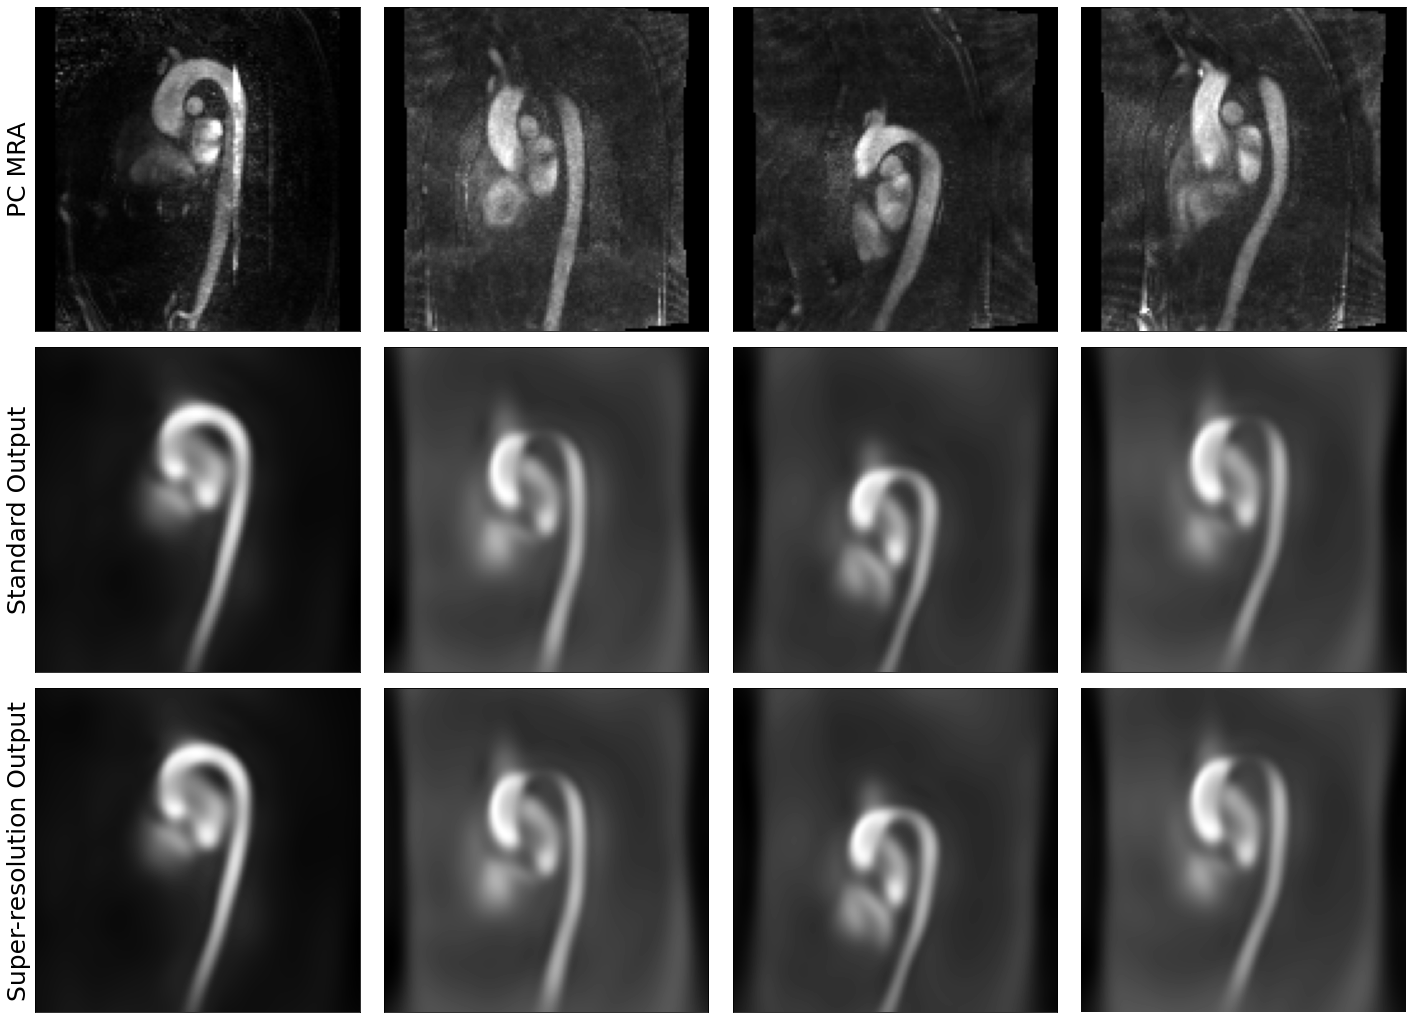

In [18]:
run = "reconstruction_normal"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "reconstruction_big_x"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(3, 4, figsize=(25, 18.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0, hspace=0.05)

plt.axis('off')

i = 132
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 0].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Standard Output", fontsize=25)
axs[2, 0].set_ylabel("Super-resolution Output", fontsize=25)

i = 151
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 1].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

i = 178
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 2].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

i = 275
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 3].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

# Reconstruction train_dl

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output']


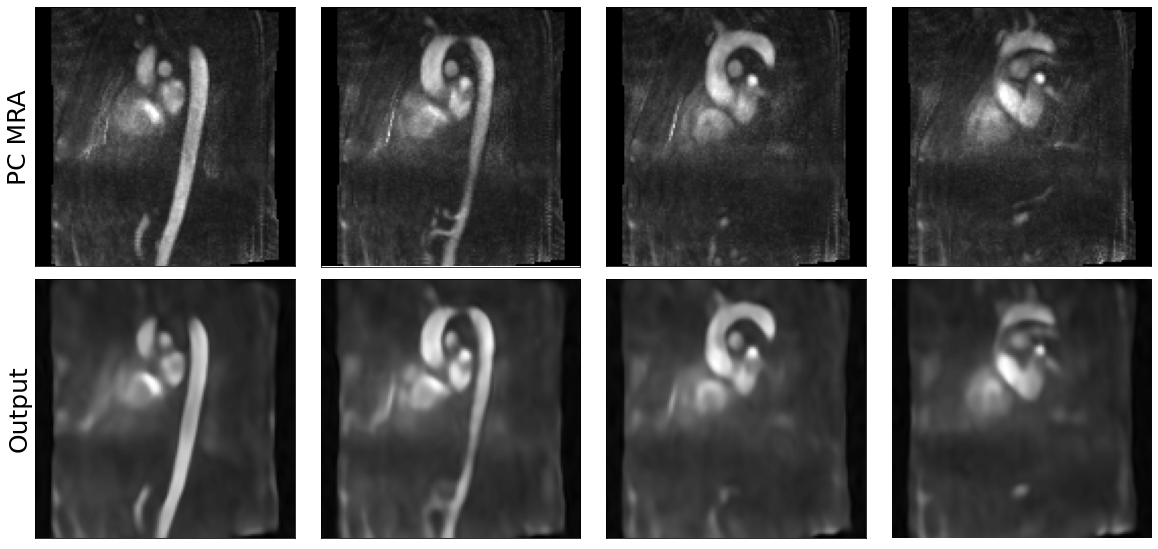

In [19]:
run = "reconstruction_train_dl_trained_one_image"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0)

plt.axis('off')

i = 9
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Output", fontsize=25)

i = 12
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 15
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 18
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")

plt.show()


c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output']


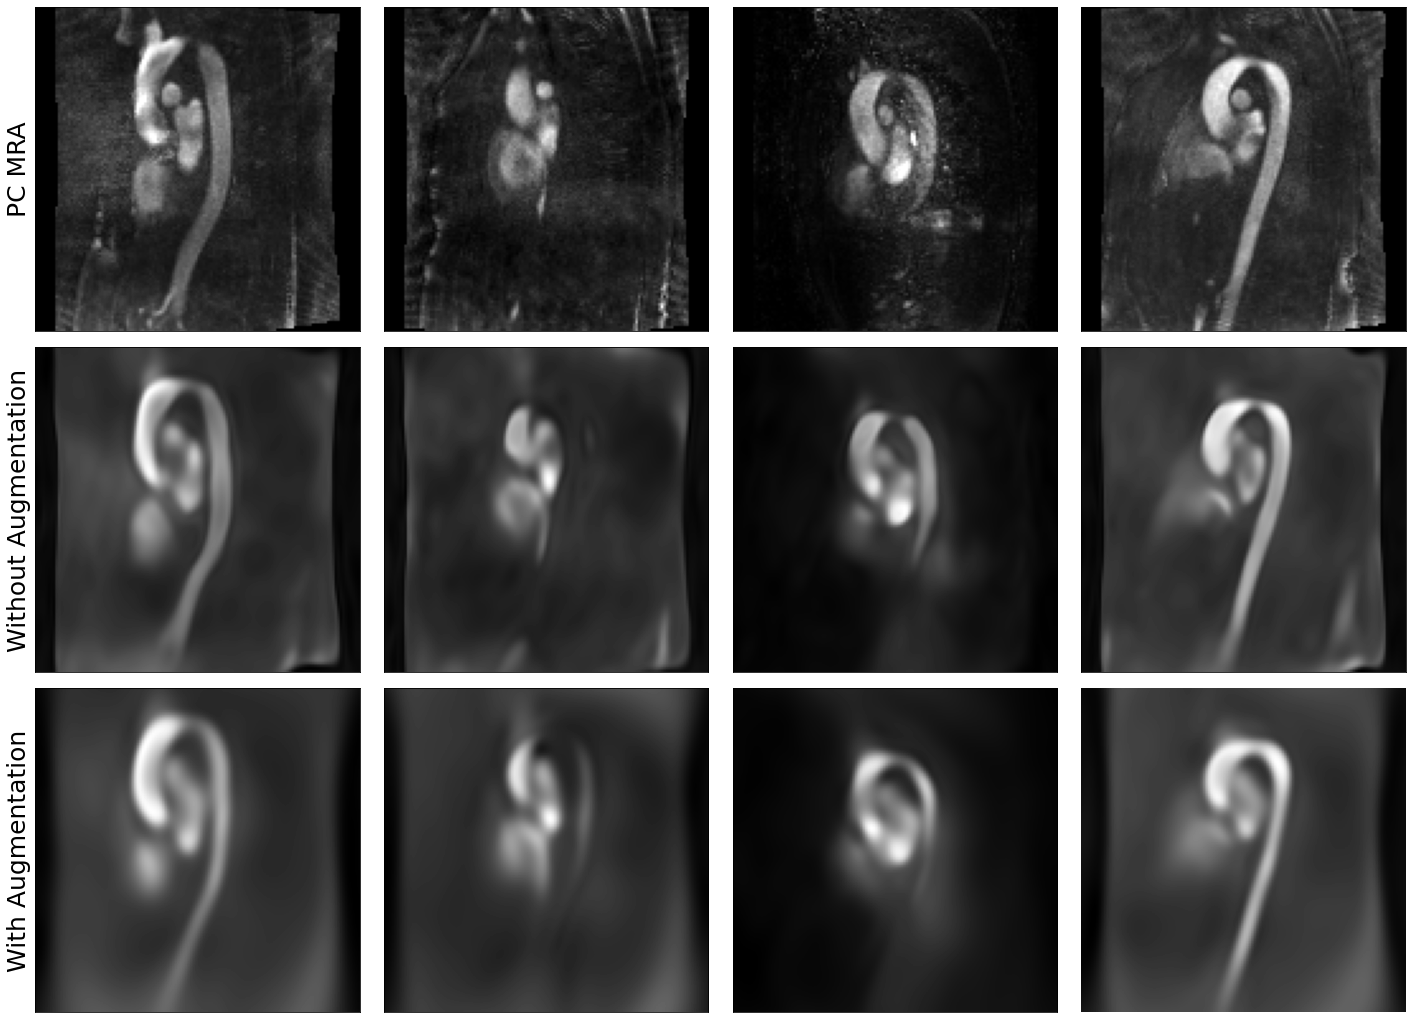

In [20]:
run = "reconstruction_train_dl_trained_without_data_aug"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "reconstruction_train_dl_trained_with_data_aug"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

    print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(3, 4, figsize=(25, 18.5))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0, hspace=0.05)

plt.axis('off')

i = 132
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 0].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Without Augmentation", fontsize=25)
axs[2, 0].set_ylabel("With Augmentation", fontsize=25)

i = 151
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 1].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

i = 515
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 2].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

i = 275
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")
axs[2, 3].imshow(images_1[1][0][:,:,i], cmap="gist_gray")

plt.show()


c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'pcmra output']


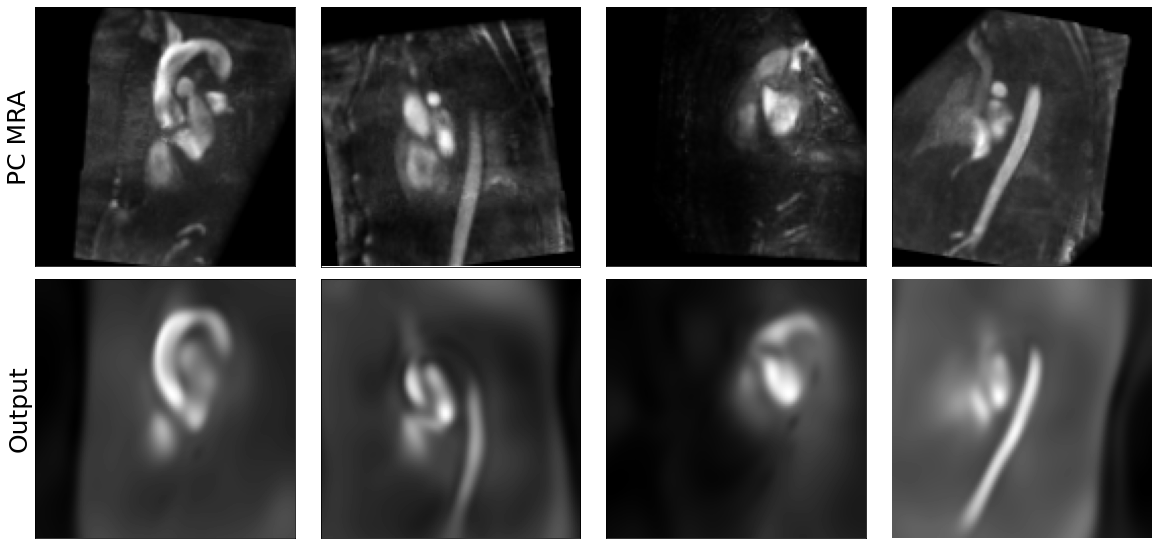

In [21]:
run = "reconstruction_train_dl_augmented_trained_with_data_aug"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0)

plt.axis('off')

i = 132
axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(images[1][0][:,:,i], cmap="gist_gray")

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Output", fontsize=25)

i = 151
axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 515
axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(images[1][0][:,:,i], cmap="gist_gray")

i = 275
axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(images[1][0][:,:,i], cmap="gist_gray")

plt.show()


# Segmentation normal vs deep

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']


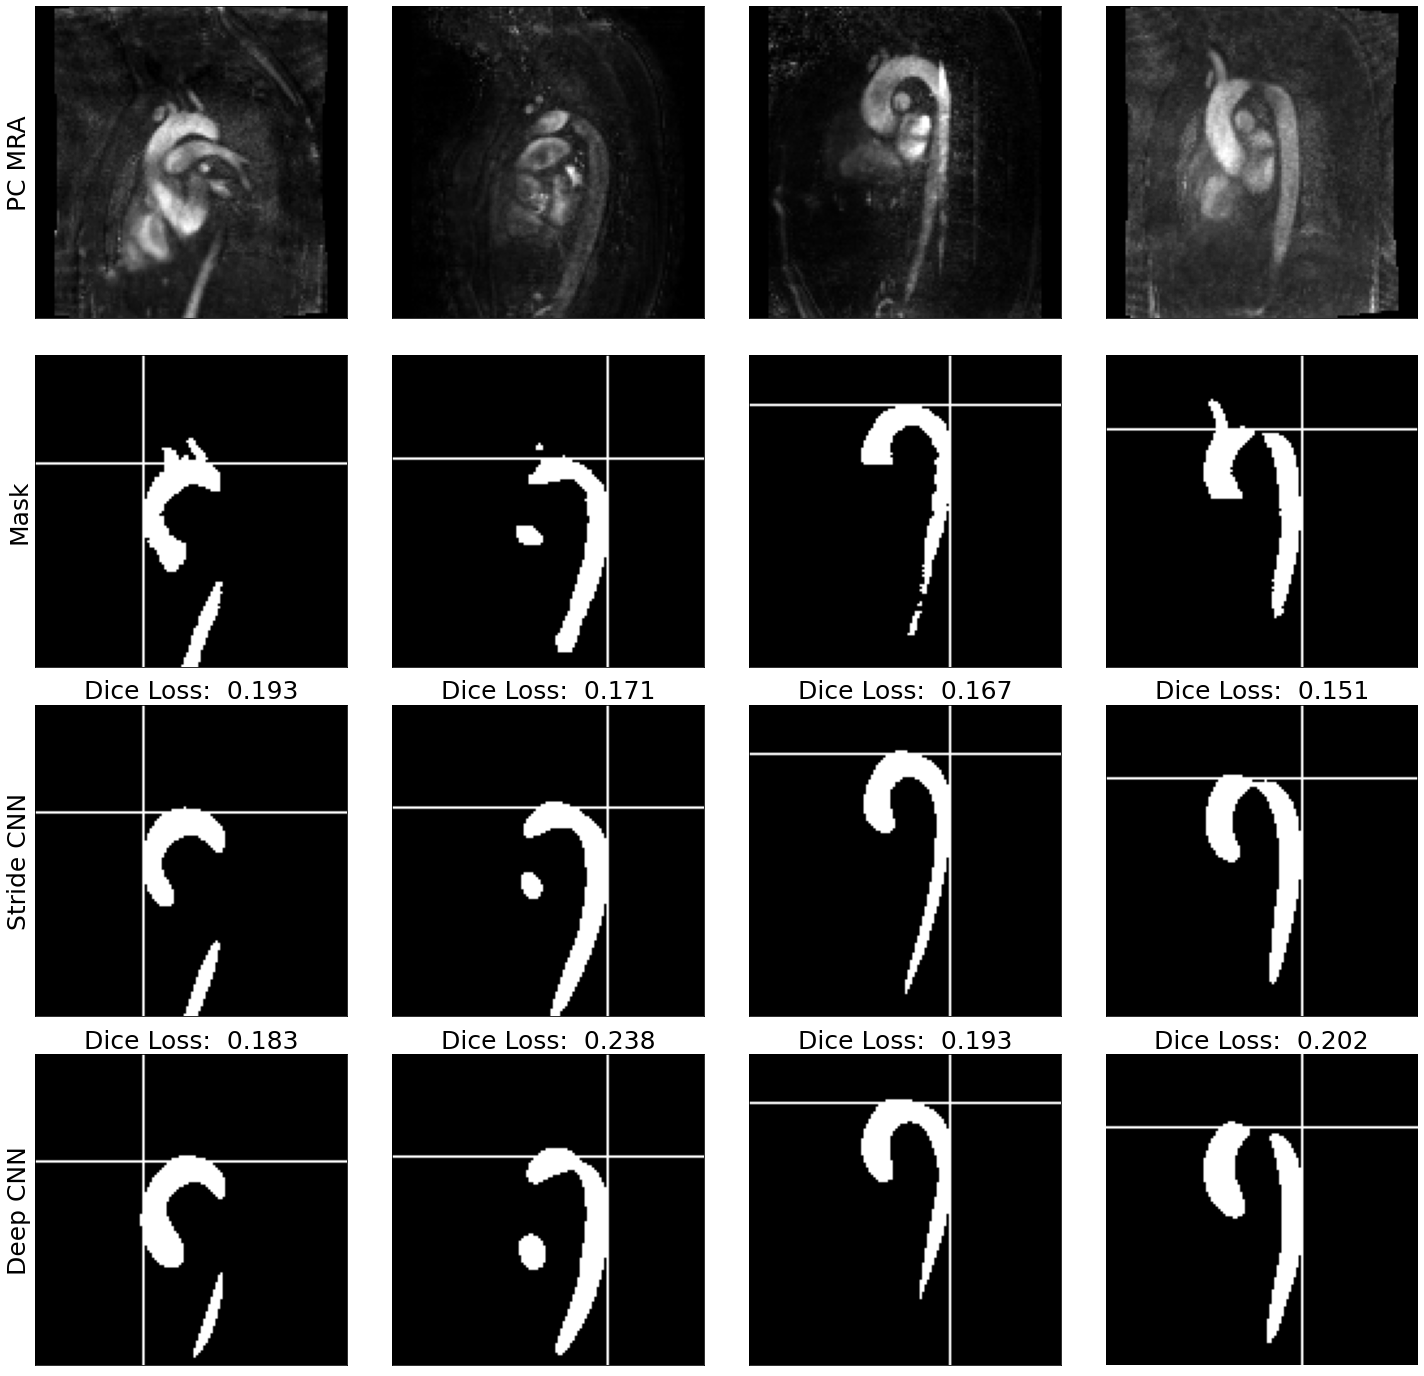

In [22]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_binary_deep"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(4, 4, figsize=(25, 25))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0.12)

plt.axis('off')

i = 83

line = np.zeros((128, 128))
line[44, :] = 1
line[:, 44] = 1

axs[0, 0].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 0].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 0].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 0].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[3, 0].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[3, 0].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

axs[0, 0].set_ylabel("PC MRA", fontsize=25)
axs[1, 0].set_ylabel("Mask", fontsize=25)
axs[2, 0].set_ylabel("Stride CNN", fontsize=25)
axs[3, 0].set_ylabel("Deep CNN", fontsize=25)

i = 542

line = np.zeros((128, 128))
line[42, :] = 1
line[:, 88] = 1

axs[0, 1].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 1].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 1].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 1].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[3, 1].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[3, 1].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

i = 133

line = np.zeros((128, 128))
line[20, :] = 1
line[:, 82] = 1

axs[0, 2].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 2].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 2].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 2].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[3, 2].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[3, 2].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

i = 153

line = np.zeros((128, 128))
line[30, :] = 1
line[:, 80] = 1

axs[0, 3].imshow(images[0][0][:,:,i], cmap="gist_gray")
axs[1, 3].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 3].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 3].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[3, 3].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[3, 3].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

# i = 397
# axs[0, 4].imshow(images[0][0][:,:,i], cmap="gist_gray")
# axs[1, 4].imshow(images[1][0][:,:,i], cmap="gist_gray")
# axs[2, 4].imshow(images[2][0][:,:,i], cmap="gist_gray")
# axs[3, 4].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

# i = 345
# axs[0, 5].imshow(images[0][0][:,:,i], cmap="gist_gray")
# axs[1, 5].imshow(images[1][0][:,:,i], cmap="gist_gray")
# axs[2, 5].imshow(images[2][0][:,:,i], cmap="gist_gray")
# axs[3, 5].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

plt.show()

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']


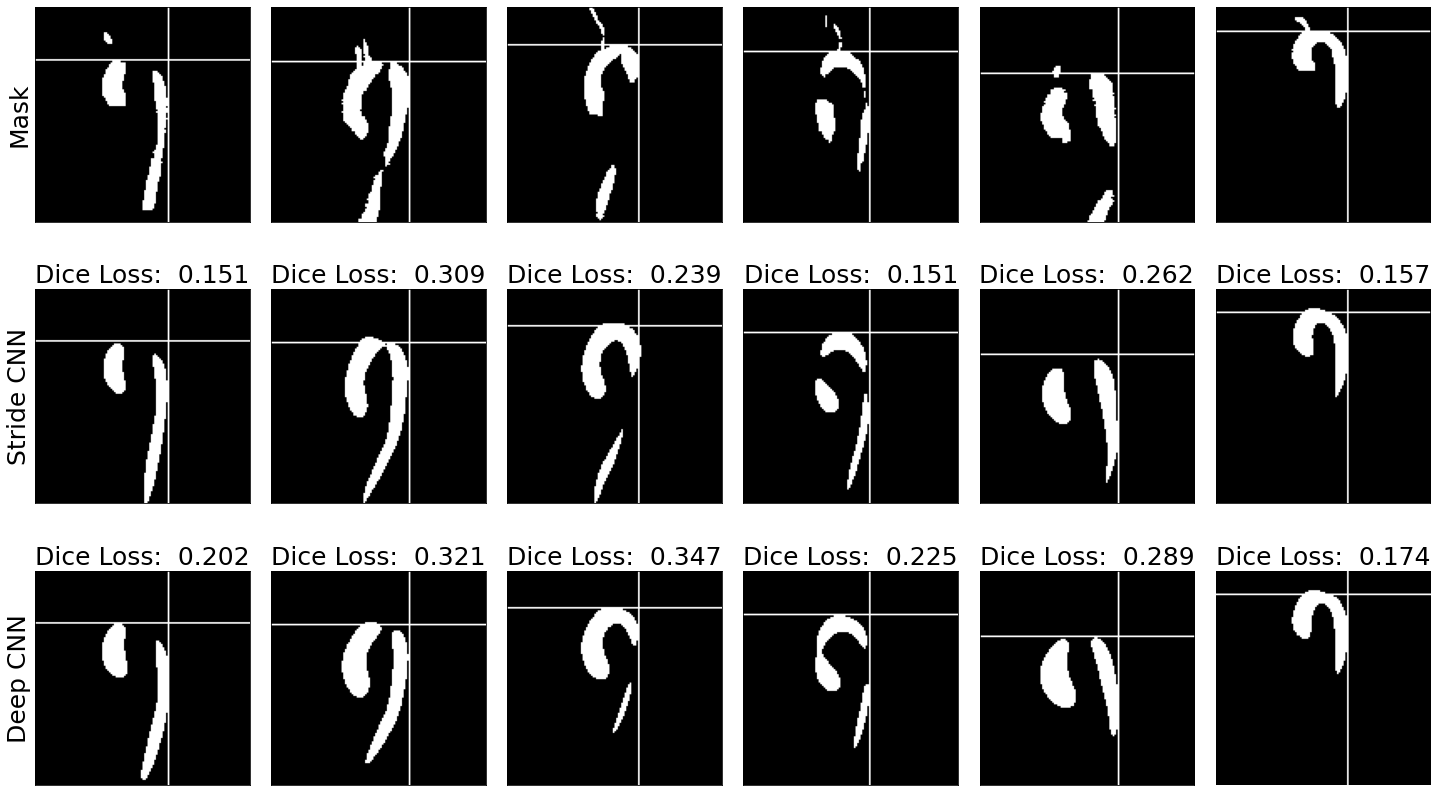

In [23]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_binary_deep"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(3, 6, figsize=(25, 15))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.1, hspace=0.12)

plt.axis('off')

i = 150

line = np.zeros((128, 128))
line[31, :] = 1
line[:, 79] = 1

axs[0, 0].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 0].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 0].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[2, 0].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 0].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

axs[0, 0].set_ylabel("Mask", fontsize=25)
axs[1, 0].set_ylabel("Stride CNN", fontsize=25)
axs[2, 0].set_ylabel("Deep CNN", fontsize=25)

i = 200

line = np.zeros((128, 128))
line[32, :] = 1
line[:, 82] = 1

axs[0, 1].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 1].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 1].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[2, 1].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 1].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

i = 300

line = np.zeros((128, 128))
line[22, :] = 1
line[:, 78] = 1

axs[0, 2].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 2].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 2].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[2, 2].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 2].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

i = 400

line = np.zeros((128, 128))
line[26, :] = 1
line[:, 75] = 1

axs[0, 3].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 3].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 3].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[2, 3].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 3].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

i = 250

line = np.zeros((128, 128))
line[39, :] = 1
line[:, 82] = 1

axs[0, 4].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 4].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 4].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[2, 4].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 4].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)

i = 60

line = np.zeros((128, 128))
line[14, :] = 1
line[:, 78] = 1

axs[0, 5].imshow(np.clip((images[1][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 5].imshow(np.clip((images[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[1, 5].set_title("Dice Loss: " + titles[i].split(",")[3].split(":")[1], fontsize=25)
axs[2, 5].imshow(np.clip((images_1[2][0][:,:,i] + line), 0, 1), cmap="gist_gray")
axs[2, 5].set_title("Dice Loss: " + titles_1[i].split(",")[3].split(":")[1], fontsize=25)


# i = 397
# axs[0, 4].imshow(images[0][0][:,:,i], cmap="gist_gray")
# axs[1, 4].imshow(images[1][0][:,:,i], cmap="gist_gray")
# axs[2, 4].imshow(images[2][0][:,:,i], cmap="gist_gray")
# axs[3, 4].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

# i = 345
# axs[0, 5].imshow(images[0][0][:,:,i], cmap="gist_gray")
# axs[1, 5].imshow(images[1][0][:,:,i], cmap="gist_gray")
# axs[2, 5].imshow(images[2][0][:,:,i], cmap="gist_gray")
# axs[3, 5].imshow(images_1[2][0][:,:,i], cmap="gist_gray")

plt.show()

c:\users\pault\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pcmras' 'masks' 'mask output']
(128, 128, 720)
(128, 128, 720)


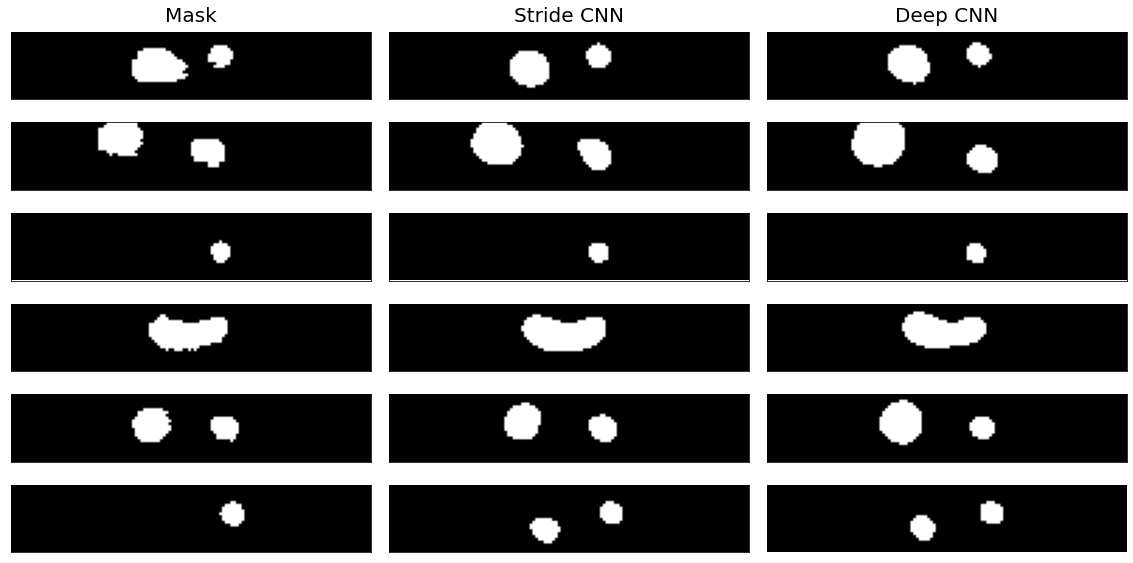

In [24]:
run = "segmentation_binary"

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles = pickle.load(f)

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images = pickle.load(f)

run = "segmentation_binary_deep"

with open(os.path.join("saved_results", run, "images.pkl"), 'rb') as f:
    images_1 = pickle.load(f)

with open(os.path.join("saved_results", run, "titles.pkl"), 'rb') as f:
    titles_1 = pickle.load(f)

print(np.array([image[1] for image in images]))

fig, axs = plt.subplots(6, 3, figsize=(20, 10))

for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(wspace=0.05, hspace=0.)

plt.axis('off')

print(images[2][0].shape)
print(images_1[2][0].shape)


transpose = (2, 1, 0)

label = images[1][0].reshape(128, 128, 30, 24)
mask = images[2][0].reshape(128, 128, 30, 24)
mask_1 = images_1[2][0].reshape(128, 128, 30, 24)

slce = 50

subj = 0 
axs[0, 0].imshow(np.transpose(label[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[0, 0].set_title("Mask", fontsize=20, pad=10)

axs[0, 1].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[0, 1].set_title("Stride CNN", fontsize=20, pad=10)

axs[0, 2].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[0, 2].set_title("Deep CNN", fontsize=20, pad=10)

subj = 1
axs[1, 0].imshow(np.transpose(label[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[1, 1].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[1, 2].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")

subj = 2
# slce = 
axs[2, 0].imshow(np.transpose(label[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[2, 1].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[2, 2].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")

subj = 3
axs[3, 0].imshow(np.transpose(label[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[3, 1].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[3, 2].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")


subj = 4
axs[4, 0].imshow(np.transpose(label[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[4, 1].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[4, 2].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")


subj = 5
axs[5, 0].imshow(np.transpose(label[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[5, 1].imshow(np.transpose(mask[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
axs[5, 2].imshow(np.transpose(mask_1[:,:, subj, :], transpose)[:, :, slce], cmap="gist_gray")
